<a href="https://colab.research.google.com/github/thefr33radical/hybrid_forecasting/blob/master/code/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exponential Smooting

In [0]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import requests
import io

data = pd.read_csv("https://raw.githubusercontent.com/thefr33radical/hybrid_forecasting/master/data/parsed_inpatients.csv", error_bad_lines=False,header=0, parse_dates=[1], index_col=0, squeeze=True)
data["num"] = data["num"].astype(float)

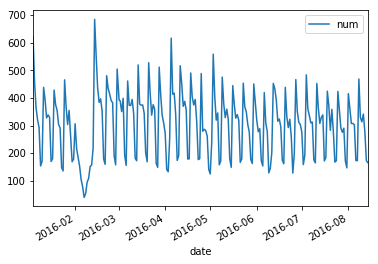

In [45]:
data.plot.line(x = 'date',y = 'num')
plt.show()



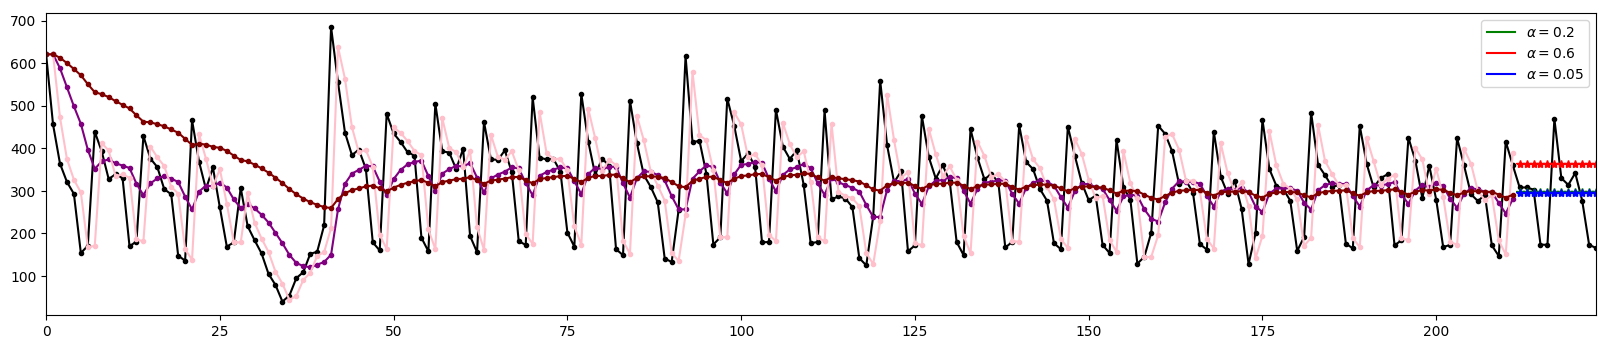

In [105]:
plt.figure(num=None, figsize=(20, 4), dpi=100,facecolor='w', edgecolor='k')
plt.plot(data["num"],marker='.',color="black")

values = data.iloc[:-12,1]
#print(values)
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(values).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='*', color='green', legend=True)
fit1.fittedvalues.plot(marker='.',  color='purple')

fit2 = SimpleExpSmoothing(values).fit(smoothing_level=0.9,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='*', color='red', legend=True)
fit2.fittedvalues.plot(marker='.', color='pink')

fit3 = SimpleExpSmoothing(values).fit(smoothing_level=0.05,optimized=False)
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='*', color='blue', legend=True)
fit3.fittedvalues.plot(marker='.', color='maroon')

plt.show()


## Exponential Smoothing
#### Links
* https://github.com/thefr33radical/hybrid_forecasting/blob/master/data/parsed_inpatients.csv
* https://medium.com/datadriveninvestor/how-to-build-exponential-smoothing-models-using-python-simple-exponential-smoothing-holt-and-da371189e1a1